In [3]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

ERROR: File `u'! DEFAULT PLOT THINGIES.ipynb.py'` not found.


<IPython.core.display.Javascript object>

`%matplotlib` prevents importing * from pylab and numpy


Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\biax-MSD
Populating the interactive namespace from numpy and matplotlib


In [4]:
tracked_measurements = []

for measurement in all_biax_measurements:
    _, name = os.path.split(measurement['path'])
    
    trackdata = glob.glob('u:/particle track data/%s.npz' % name)
    if not trackdata:
        continue
    
    measurement['trackdata'] = trackdata[0]
    tracked_measurements.append(measurement)

# voor deze set:
px_per_tick = 0.0008251
mm_per_px = 4.95e-5 / px_per_tick
print mm_per_px

0.0599927281542


In [5]:
def MSD_fulldata(position_data, particle_data, dt, affine_corrected):
    position_data = np.loadtxt(position_data)
    fps = 1/np.mean(np.diff(position_data[:,0]))
    
    particle_data = np.load(particle_data)
    
    X = particle_data["X"]
    Y = particle_data["Y"]
    r = particle_data["r"]
    
    if affine_corrected:
        Bticks = position_data[:,2]
        CDticks = position_data[:,3]
        
        ## WAAR HAAL IK DEZE INFO HANDIG VANDAAN, YO
        zeroB = 755.5
        zeroCD = 947.4
        px_per_tick = 0.0008251
        x0 = 147
        y0 = 913
        
        Bpos = zeroB + Bticks*px_per_tick
        CDpos = zeroCD + CDticks*px_per_tick
        
        X = (X-x0) / CDpos[:,np.newaxis]
        Y = (y0-Y) / Bpos[:,np.newaxis]
        
    # voor elke gevraagde dt zoeken we een index die er zo goed mogelijk bij past
    # maar omgekeerd moet de dt ook het beste bij die index passen (snap je 'm nog?)
    # bv. we vragen dt=1,2,3,4, maar we imagen met 0.5 fps
    # dan willen we np.nan, delta_index=1, np.nan, delta_index=2 retourneren.
    # voor nu: retourneer actual_dts en maak 
    
    di = np.int_(np.round(dt * fps))
    
    X0 = X[:-di,:]
    X1 = X[di:,:]
    dX = X0-X1

    Y0 = Y[:-di,:]
    Y1 = Y[di:,:]
    dY = Y0-Y1
    
    return dX, dY

\includegraphics{notebooks/biax-MSD/msd-regular.pdf}


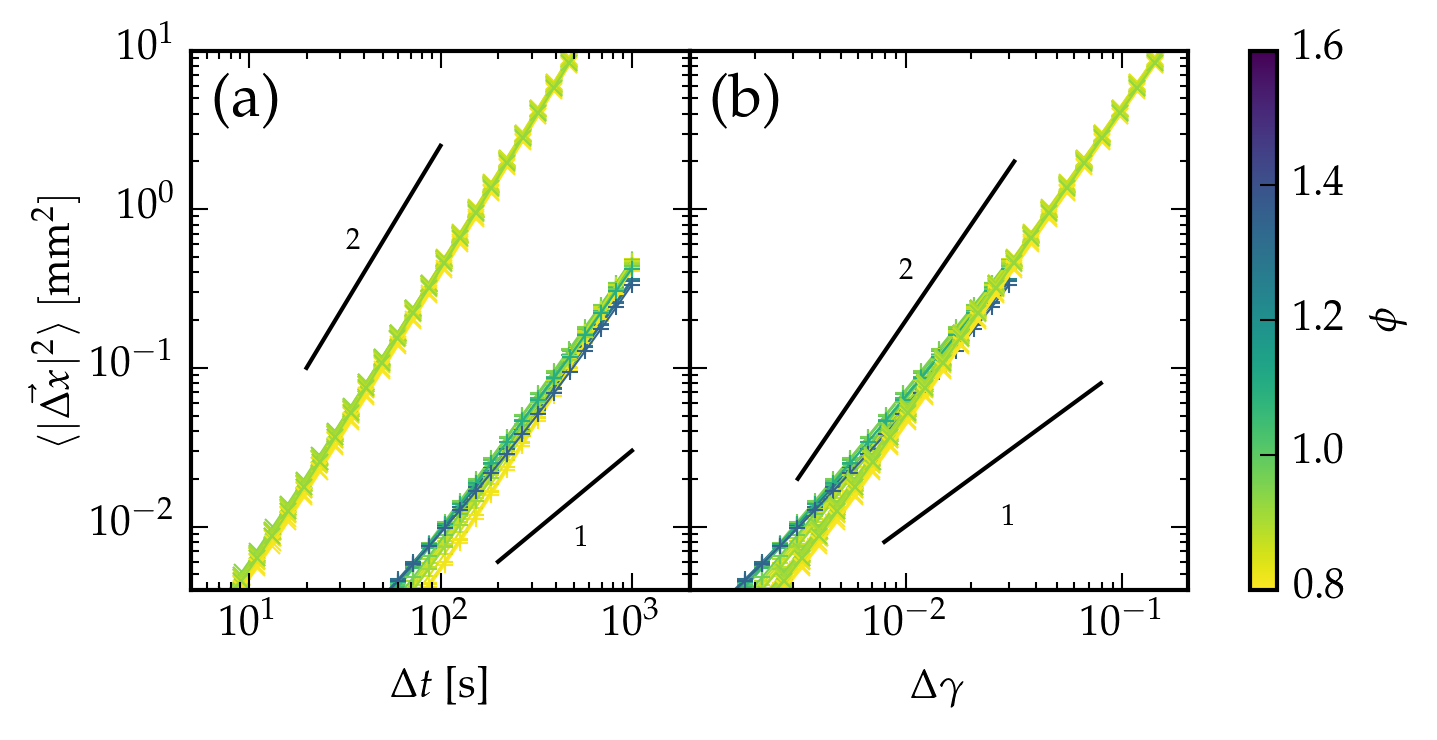

In [77]:
# map phi to color
# gammadot to line style

cmap = plt.get_cmap('viridis_r')
norm = phi_norm

def phi_to_color(phi):
    return cmap(norm(phi))

f = fullfig()
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ymin = 4e-3
ymax = 1e1
for ax in [ax1, ax2]:
    ax.axis(ymin=ymin, ymax=ymax)
    ax.set_yscale('log')
    ax.set_xscale('log')
    
ax1.axis(xmin=5e0, xmax=2e3)
ax1.set_xlabel(r'$\Delta t$ [s]')
#ax1.set_xticks([1e-1, 1e0, 1e1, 1e2])
ax2.axis(xmin=1e-3, xmax=2e-1)
ax2.set_xticks([1e-2,1e-1])

ax2.set_xlabel(r'$\Delta\gamma$')

ax2.set_yticklabels([])
plt.subplots_adjust(wspace=0)

plt.scatter([-100], [-100], c=[0], cmap=cmap, norm=norm)
cb = plt.colorbar(ax=[ax1,ax2])
cb.set_ticks([0.8, 1, 1.2, 1.4, 1.6])
cb.set_label(r'$\phi$')

for measurement in tracked_measurements:
    # generated by 20160414 verwerking mark 3.ipynb
    msd_data = np.load(measurement['path'] + "/msd.npz")

    color = phi_to_color(measurement['phi'])
    marker = "+" if measurement['shear_rate'] < 1e-4 else "x"
    ax1.plot(msd_data["actualdts"], msd_data["msd"] * mm_per_px**2,
             color=color, marker=marker, ms=4, lw=0.5)
    ax2.plot(msd_data["actualdts"]*measurement['shear_rate'], msd_data["msd"] * mm_per_px**2,
             color=color, marker=marker, ms=4, lw=0.5)

f.text(0.05, 0.57, r'$\langle | \vec{\Delta x} |^2 \rangle~[\textrm{mm}^2]$',
       horizontalalignment='right', verticalalignment='center',
       rotation='vertical')


xs = np.logspace(1.3,2)
ax1.plot(xs, xs**2 * (1e-1 / (np.amin(xs))**2), color='black')
x = 35
ax1.text(x, (x)**2 * (2e-1 / (np.amin(xs))**2), '2', fontsize='x-small', ha='center', va='center')

xs = np.logspace(2.3,3)
ax1.plot(xs, xs * (6e-3 / (np.amin(xs))), color='black')
x = 550
ax1.text(x, (x) * (3e-3 / (np.amin(xs))), '1', fontsize='x-small', ha='center', va='center')


xs = np.logspace(-2.5,-1.5)

ax2.plot(xs, xs**2 * (2e-2 / (np.amin(xs))**2), color='black')
x = 1e-2
ax2.text(x, (x)**2 * (4e-2 / (np.amin(xs))**2), '2', fontsize='x-small', ha='center', va='center')

xs = np.logspace(-2.1,-1.1)
ax2.plot(xs, xs * (8e-3 / (np.amin(xs))), color='black')
x = 3e-2
ax2.text(x, (x) * (3e-3 / (np.amin(xs))), '1', fontsize='x-small', ha='center', va='center')

subplotlabel('(a)', ax=ax1)
subplotlabel('(b)', ax=ax2)
plt.savefig('msd-regular.pdf')

\includegraphics{notebooks/biax-MSD/msd-longdt.pdf}


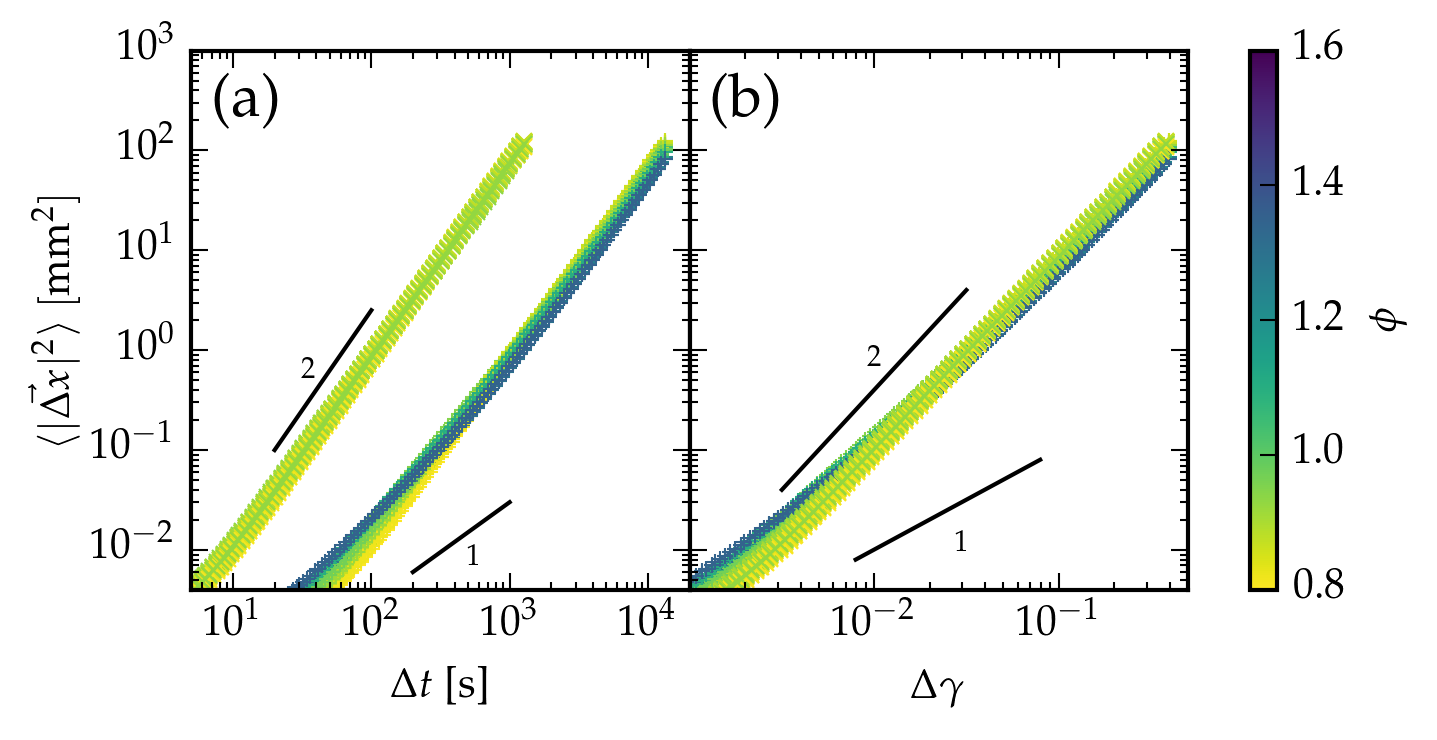

In [79]:
# map phi to color
# gammadot to line style

cmap = plt.get_cmap('viridis_r')
norm = phi_norm

def phi_to_color(phi):
    return cmap(norm(phi))

f = fullfig()
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ymin = 4e-3
ymax = 1e3
for ax in [ax1, ax2]:
    ax.axis(ymin=ymin, ymax=ymax)
    ax.set_yscale('log')
    ax.set_xscale('log')
    
ax1.axis(xmin=5e0, xmax=2e4)
ax1.set_xlabel(r'$\Delta t$ [s]')
#ax1.set_xticks([1e-1, 1e0, 1e1, 1e2])
ax2.axis(xmin=1e-3, xmax=5e-1)
ax2.set_xticks([1e-2,1e-1])

ax2.set_xlabel(r'$\Delta\gamma$')

ax2.set_yticklabels([])
plt.subplots_adjust(wspace=0)

plt.scatter([-100], [-100], c=[0], cmap=cmap, norm=norm)
cb = plt.colorbar(ax=[ax1,ax2])
cb.set_ticks([0.8, 1, 1.2, 1.4, 1.6])
cb.set_label(r'$\phi$')

for measurement in tracked_measurements:
    # generated by 20160414 verwerking mark 3.ipynb
    msd_data = np.load(measurement['path'] + "/msd-extended.npz")

    color = phi_to_color(measurement['phi'])
    marker = "+" if measurement['shear_rate'] < 1e-4 else "x"
    ax1.plot(msd_data["actualdts"], msd_data["msd"] * mm_per_px**2,
             color=color, marker=marker, ms=4, lw=0.5)
    ax2.plot(msd_data["actualdts"]*measurement['shear_rate'], msd_data["msd"] * mm_per_px**2,
             color=color, marker=marker, ms=4, lw=0.5)

f.text(0.05, 0.57, r'$\langle | \vec{\Delta x} |^2 \rangle~[\textrm{mm}^2]$',
       horizontalalignment='right', verticalalignment='center',
       rotation='vertical')

subplotlabel('(a)', ax=ax1)
subplotlabel('(b)', ax=ax2)


xs = np.logspace(1.3,2)
ax1.plot(xs, xs**2 * (1e-1 / (np.amin(xs))**2), color='black')
x = 35
ax1.text(x, (x)**2 * (2e-1 / (np.amin(xs))**2), '2', fontsize='x-small', ha='center', va='center')

xs = np.logspace(2.3,3)
ax1.plot(xs, xs * (6e-3 / (np.amin(xs))), color='black')
x = 550
ax1.text(x, (x) * (3e-3 / (np.amin(xs))), '1', fontsize='x-small', ha='center', va='center')


xs = np.logspace(-2.5,-1.5)

ax2.plot(xs, xs**2 * (4e-2 / (np.amin(xs))**2), color='black')
x = 1e-2
ax2.text(x, (x)**2 * (8e-2 / (np.amin(xs))**2), '2', fontsize='x-small', ha='center', va='center')

xs = np.logspace(-2.1,-1.1)
ax2.plot(xs, xs * (8e-3 / (np.amin(xs))), color='black')
x = 3e-2
ax2.text(x, (x) * (3e-3 / (np.amin(xs))), '1', fontsize='x-small', ha='center', va='center')

plt.savefig('msd-longdt.pdf')

\includegraphics{notebooks/biax-MSD/msd-ac.pdf}


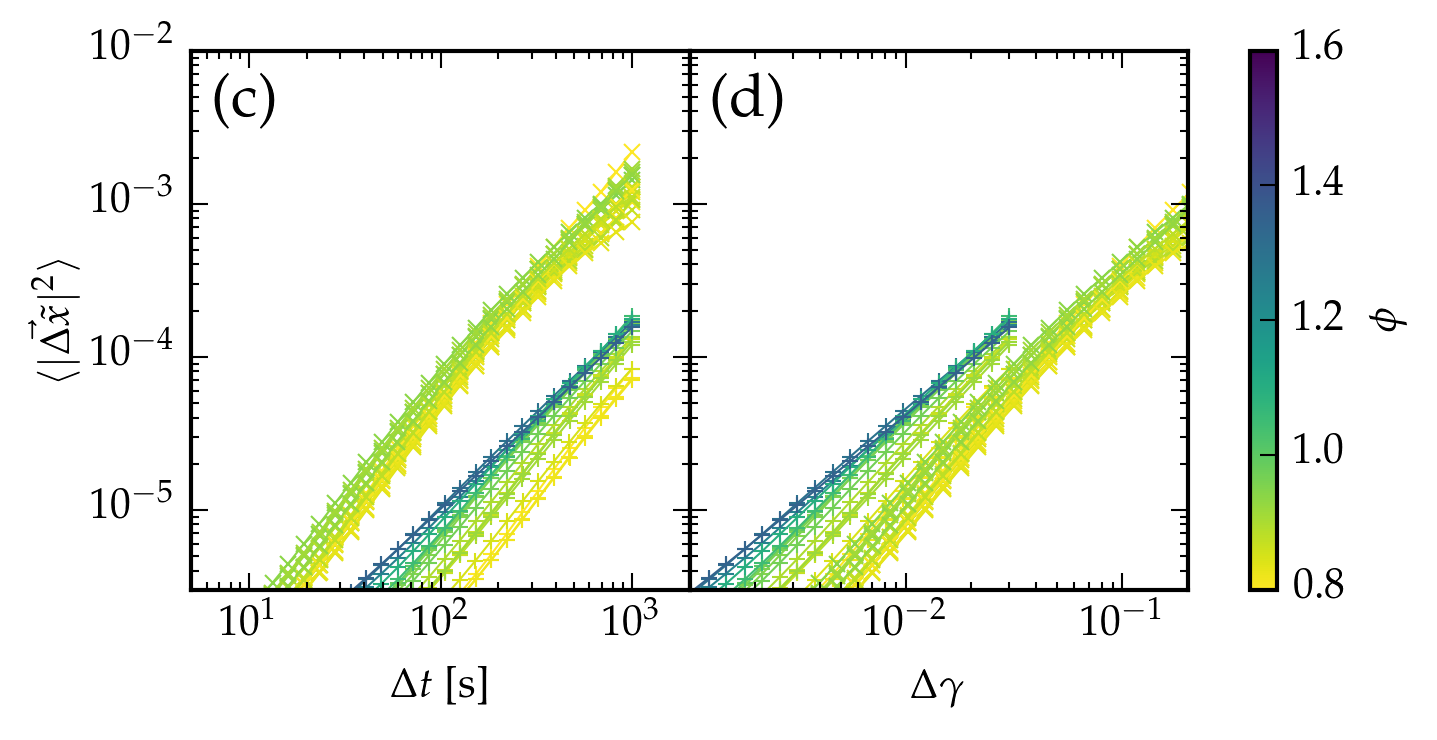

In [12]:
# map phi to color
# gammadot to line style

cmap = plt.get_cmap('viridis_r')
norm = phi_norm

def phi_to_color(phi):
    return cmap(norm(phi))

f = fullfig()
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ymin = 3e-6
ymax = 1e-2
for ax in [ax1, ax2]:
    ax.axis(ymin=ymin, ymax=ymax)
    ax.set_yscale('log')
    ax.set_xscale('log')
    
ax1.axis(xmin=5e0, xmax=2e3)
ax1.set_xlabel(r'$\Delta t$ [s]')
#ax1.set_xticks([1e-1, 1e0, 1e1, 1e2])
ax2.axis(xmin=1e-3, xmax=2e-1)
ax2.set_xticks([1e-2,1e-1])

ax2.set_xlabel(r'$\Delta\gamma$')

ax2.set_yticklabels([])
plt.subplots_adjust(wspace=0)

plt.scatter([-100], [-100], c=[0], cmap=cmap, norm=norm)
cb = plt.colorbar(ax=[ax1,ax2])
cb.set_ticks([0.8, 1, 1.2, 1.4, 1.6])
cb.set_label(r'$\phi$')

for measurement in tracked_measurements:
    msd_data = np.load(measurement['path'] + "/msd.npz")

    color = phi_to_color(measurement['phi'])
    marker = "+" if measurement['shear_rate'] < 1e-4 else "x"
    ax1.plot(msd_data["ac_actualdts"], msd_data["ac_msd"],
             color=color, marker=marker, ms=4, lw=0.5)
    ax2.plot(msd_data["ac_actualdts"]*measurement['shear_rate'], msd_data["ac_msd"],
             color=color, marker=marker, ms=4, lw=0.5)

f.text(0.05, 0.57, r'$\langle | \vec{\Delta \tilde x} |^2 \rangle$',
       horizontalalignment='right', verticalalignment='center',
       rotation='vertical')

subplotlabel('(c)', ax=ax1)
subplotlabel('(d)', ax=ax2)
plt.savefig('msd-ac.pdf')

\includegraphics{notebooks/biax-MSD/msd-ac-longdt.pdf}


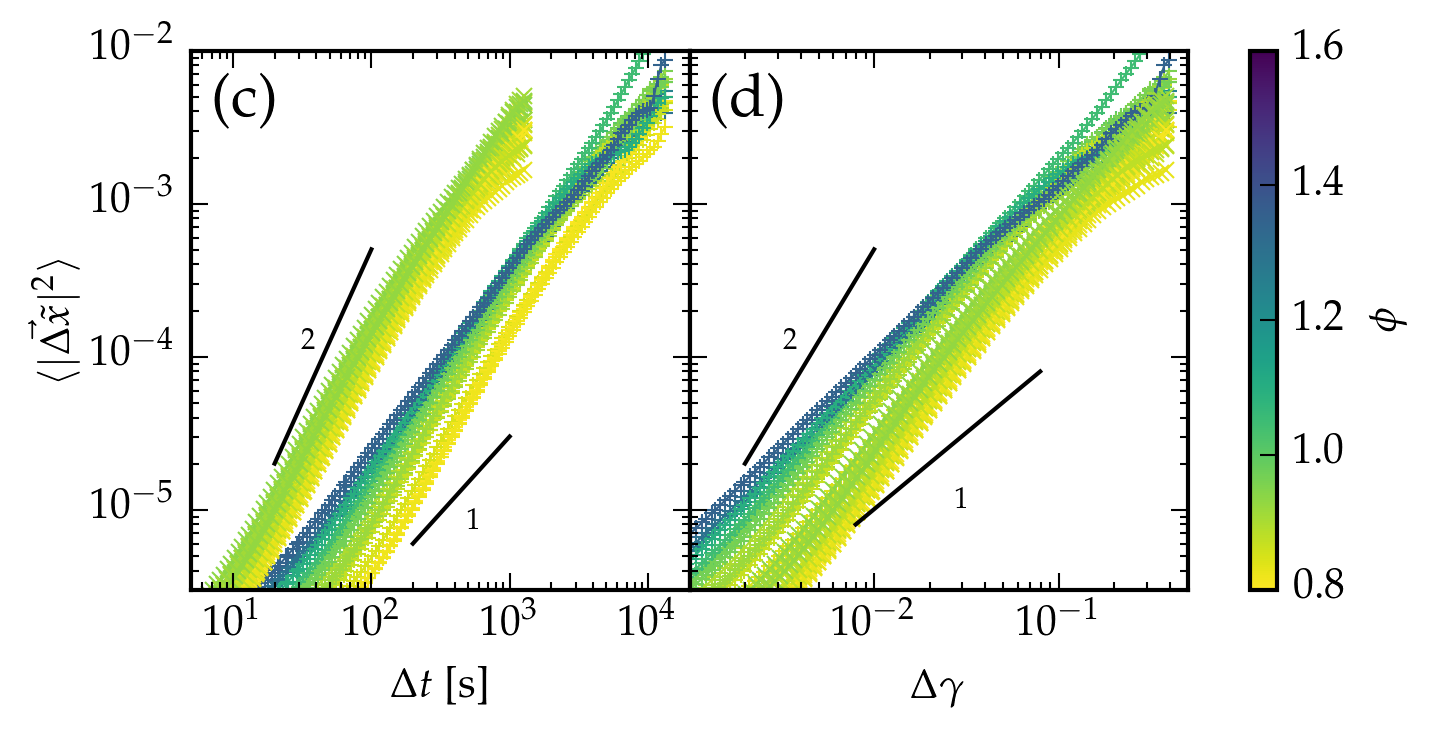

In [85]:
# map phi to color
# gammadot to line style

cmap = plt.get_cmap('viridis_r')
norm = phi_norm

def phi_to_color(phi):
    return cmap(norm(phi))

f = fullfig()
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ymin = 3e-6
ymax = 1e-2
for ax in [ax1, ax2]:
    ax.axis(ymin=ymin, ymax=ymax)
    ax.set_yscale('log')
    ax.set_xscale('log')
    
ax1.axis(xmin=5e0, xmax=2e4)
ax1.set_xlabel(r'$\Delta t$ [s]')
#ax1.set_xticks([1e-1, 1e0, 1e1, 1e2])
ax2.axis(xmin=1e-3, xmax=5e-1)
ax2.set_xticks([1e-2,1e-1])

ax2.set_xlabel(r'$\Delta\gamma$')

ax2.set_yticklabels([])
plt.subplots_adjust(wspace=0)

plt.scatter([-100], [-100], c=[0], cmap=cmap, norm=norm)
cb = plt.colorbar(ax=[ax1,ax2])
cb.set_ticks([0.8, 1, 1.2, 1.4, 1.6])
cb.set_label(r'$\phi$')

for measurement in tracked_measurements:
    msd_data = np.load(measurement['path'] + "/msd-extended.npz")

    color = phi_to_color(measurement['phi'])
    marker = "+" if measurement['shear_rate'] < 1e-4 else "x"
    ax1.plot(msd_data["ac_actualdts"], msd_data["ac_msd"],
             color=color, marker=marker, ms=4, lw=0.5)
    ax2.plot(msd_data["ac_actualdts"]*measurement['shear_rate'], msd_data["ac_msd"],
             color=color, marker=marker, ms=4, lw=0.5)

f.text(0.05, 0.57, r'$\langle | \vec{\Delta \tilde x} |^2 \rangle$',
       horizontalalignment='right', verticalalignment='center',
       rotation='vertical')

subplotlabel('(c)', ax=ax1)
subplotlabel('(d)', ax=ax2)

xs = np.logspace(1.3,2)
ax1.plot(xs, xs**2 * (2e-5 / (np.amin(xs))**2), color='black')
x = 35
ax1.text(x, (x)**2 * (4e-5 / (np.amin(xs))**2), '2', fontsize='x-small', ha='center', va='center')

xs = np.logspace(2.3,3)
ax1.plot(xs, xs * (6e-6 / (np.amin(xs))), color='black')
x = 550
ax1.text(x, (x) * (3e-6 / (np.amin(xs))), '1', fontsize='x-small', ha='center', va='center')


xs = np.logspace(-2.7,-2)

ax2.plot(xs, xs**2 * (2e-5 / (np.amin(xs))**2), color='black')
x = 35/10**1.3 * 10**-2.7
ax2.text(x, (x)**2 * (4e-5 / (np.amin(xs))**2), '2', fontsize='x-small', ha='center', va='center')

xs = np.logspace(-2.1,-1.1)
ax2.plot(xs, xs * (8e-6 / (np.amin(xs))), color='black')
x = 3e-2
ax2.text(x, (x) * (3e-6 / (np.amin(xs))), '1', fontsize='x-small', ha='center', va='center')

plt.savefig('msd-ac-longdt.pdf')